<a href="https://colab.research.google.com/github/rajashekarkasturi/ML-hands-on/blob/master/Part_3_NNetworks_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is Regression Problem?
* Predicting a number based on data
* How much will this house sell for?
* How many people will buy this app?
* How much will my Health insurance be?
* How much should I save each week for fuel?

##Sub-topics
* Architecture of an neural network regression model
* Input shapes and output shapes of the regression model
* Creating custom data to view and fit
* Steps in modelling
  * Creating a model
  * Compiling a model
  * Fitting a model
  * Evaluating a model
* Different evaluation models
* Saving and Loading models

##Hyper parameters
* Input Layer shape - Features
* Hidden layers - min,max=1,infinite
* Neurons per hidden layer - Problem specific -> 10, 100
* Output Layer shape - same shape as desired prediction shape
* Hidden activation - usually ReLU
* Output Activation - None, ReLU, logistic/tanh
* loss function - MSE(Mean square error) MAE(mean absolute error)/Huber(Combo- MSE+MAE) if outliers
* Optimizer - SGD(Stochastic Gradient Descent), Adam

In [ ]:
#Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.2


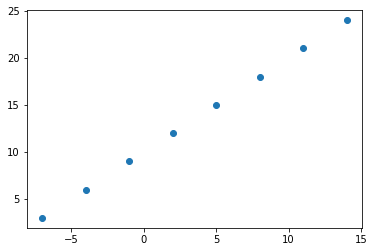

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Creating features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Creating labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [ ]:
#Creating a demo tensor for house price prediction
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([992349])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([992349], dtype=int32)>)

In [ ]:
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

##Steps in modelling with TensorFlow
1. **Creating a model** -> Input and output layers, as well as hidden layers of a deep learning model
2. **Compiling the model** -> define the loss function(Tells out model how to improve the patterns its learning) and evaluation metrics(Benchmarking).
3. **Fitting a model** - letting the model to try find patterns between X & y(Features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Creating a model using the Sequential API
model = tf.keras.Sequential([
   tf.keras.layers.Dense(1)                       
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae, #absolute differences by taking the the mean.
              optimizer = tf.keras.optimizers.SGD(), #Stochastic gradient descent.
              metrics = ["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 293ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
#Testing the model(Prediction)
model.predict([17.0])

array([[12.716021]], dtype=float32)

##Improving our Model

we can improve our model, by altering the steps we took to creating a model.
1. **Creating a model**
  a. add more layers.
  b. increase the number of hidden units within each of the hidden layers. 
  c. change the activation function of each layer.
2. **Compiling a model**
  a. changing the optimization or
  b. learning rate of the optimization function.
3. **Fitting a model**
  a. epochs, or more data to learn from

In [ ]:
#Re-building the model

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

# 2. Compiling the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 286ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
model_1.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
#1.Creating a model
model_2 = tf.keras.Sequential([ #Works in bottom up manner
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(1) #For one input we have one output                                
])

model_2.compile(loss=tf.keras.losses.mae,
  optimizer = tf.keras.optimizers.SGD(),
  metrics=["mae"]
)

model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 376ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 6ms/ste

In [ ]:
model_2.predict([17.0])

array([[31.223137]], dtype=float32)

##Take aways from the model - Common ways of improving the model
* Adding layers
* Increasing the number of hidden units
* Changing the activation functions
* Change the optimization function
* Changing the **learning rate**
* Fitting on more data
* Fitting for longer

##General Procedure of workflow and Evaluating

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

### When it comes to evaluating we need to memorize 3 things
> "Visualize, visualize, visualize"

* The data
* The model
* The training
* The predictions -> how does it align to the ground truth

In [ ]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

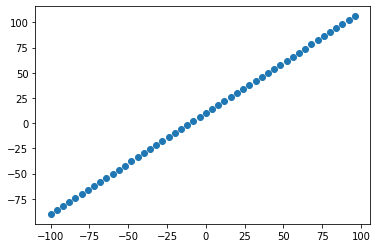

In [ ]:
#Visualize the data

import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...
* Training set - Model learing from the data typically 70%-80%
* Validation set - the model gets tuned on this data, tweak 10 -15%
* Test set - Model gets valuated on the data 10 -15%

In [ ]:
#Splitting the data into train and test sets
X_train = X[:40] #first 40 are the training(80%)
y_train = y[:40] 

X_test = X[40:] #last 10 are testing samples
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

###Visualizing test and trainsets

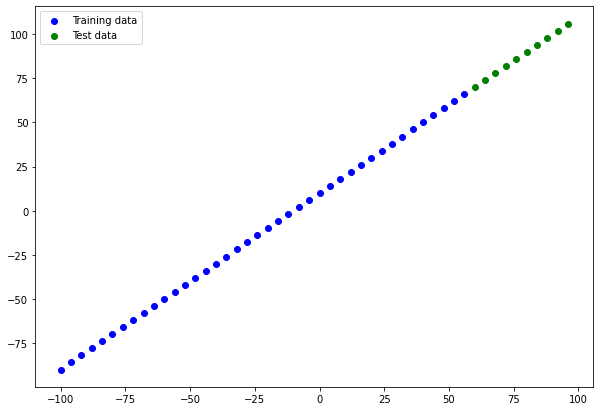

In [ ]:
plt.figure(figsize=(10,7))

#Plot the training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
#Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Test data")
#Show a legend
plt.legend()

In [ ]:
# Building a Neural Network

#Step1 create a model

model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                              
])

#step2 compile the model

model3.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

#step3: Fit the model
#model3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [ ]:
#model3.summary()

We cannot visulaize the model unitl we fit or specify the input shape for it

In [ ]:
#Building the model using the input shape as an argument

tf.random.set_seed(42)

#1 . Creating the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape = [1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")                               
], name = "Model_3_xequalsy")

#2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])


In [ ]:
model_3.summary()

Model: "Model_3_xequalsy"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total Params - Total number of parameters in the model.
* Trainable parameters - These are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters  aren't updated during training (this is typical when you bring in already learn patterns or parameters from other during **transfer training**)



In [ ]:
#Fit the model
model_3.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# summary
model_3.summary()

Model: "Model_3_xequalsy"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


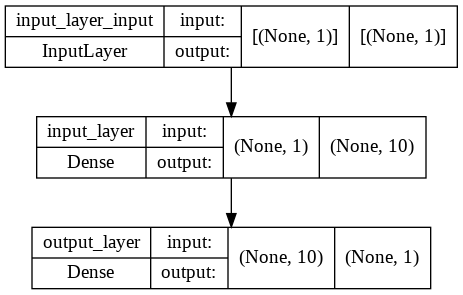

In [ ]:
#Ploting the model

from tensorflow.keras.utils import plot_model
plot_model(model = model_3, show_shapes=True)

### Visualizing our model's predictions

Visualizing the data against ground truth

`y_test` or `y_true` v/s `y_pred`(ground truth of the model)


In [ ]:
#Making predictions

y_pred = model_3.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#Ploting the data of test and groud truth
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to the ground truth labels.
  """
  plt.figure(figsize=(10,7))
  #ploting the training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  #plotting the test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  #Plotting the predictions
  plt.scatter(test_data, predictions, c="r", label="predictions")
  #Showing the legend or scale
  plt.legend();

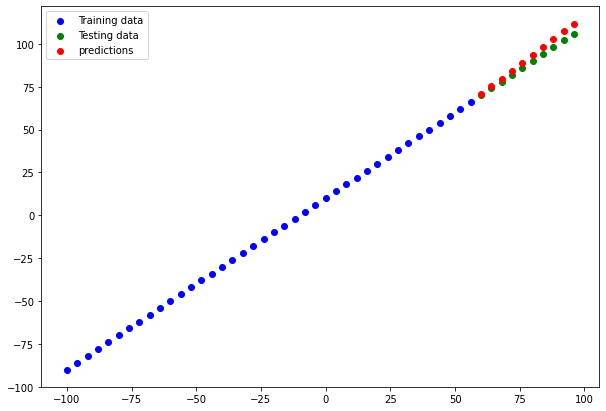

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem we are working on, there will be different evaluation metrics to evaluate our model's performance.
 Since we are working on regression, two of the main metrics are:
 * MAE - mean absolute error, "on average, how wrong is each of my model's predictions" -> mean of abs(y-x)
 * MSE - mean square error, "Square the average errors" -> mean(y - y_pred)^2

In [ ]:
#Evaluate the model on the test
model_3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 120ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred= tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
#Calculating the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
#Making functions to re-use MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred) )

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred) )

### Minimize the errors and improve our Model

1. Get more data by treating with more examples to your model, Learning patterns
2. Make more complex models and experiment with more layers and hidden units
3. Train for longer and make model to find more patterns.

### 3 Modelling experiments:
1. `Model_1` = same as the original model, 1 layers, trained for 100 epochs
2. `Model_2` = 2 layers, trained for 100 epochs
3. `Model_3` = 2 layers, trained for 500 epochs
4. --
5. --

**Build model_1**

In [ ]:
#Setting a random seed(42)
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [ ]:
# Make and plot the predictions using for model_1

y_pred_1 = model_1.predict(X_test)
y_pred_1.shape
#plot_predictions(predictions=y_pred_1)

(10, 1)

In [ ]:
# Calculating model_1 evaluation metrics

# squeezing makes the data to lower the dimension.

mae_1 = mae(y_test, y_pred_1 )
mse_1 = mse(y_test, y_pred_1 )

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`**

* 2 Dense layers, trained for 100 epochs

In [ ]:
# Model_2
tf.random.set_seed(42)
# Step1: Creating the model

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=10)

In [ ]:
# Make and plot the predictions using for model_2
#model_1.summary()
#model_2.summary()

y_pred_2 = model_2.predict(X_test)
y_pred_2.shape

(10, 1)

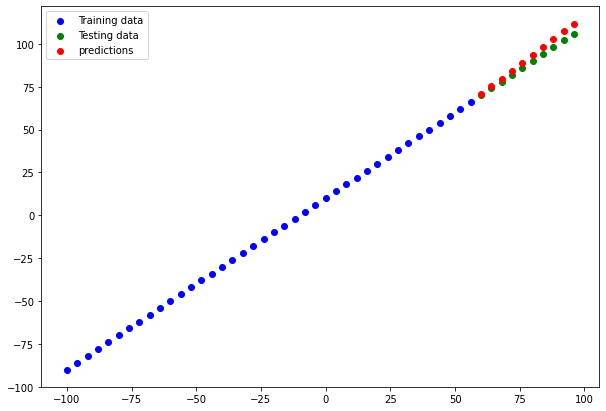

In [ ]:
plot_predictions(predictions=y_pred_2)

In [ ]:
mae_2 = mae(y_test, y_pred_2 )
mse_2 = mse(y_test, y_pred_2 )

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build `model_3`**
* 2 Layers, trained for 500 epochs

In [ ]:
model_3_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_3_1.compile(loss = tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.SGD(),
                  metrics = ["mse"])

model_3_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=0)
#model_3_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) -> overfitted

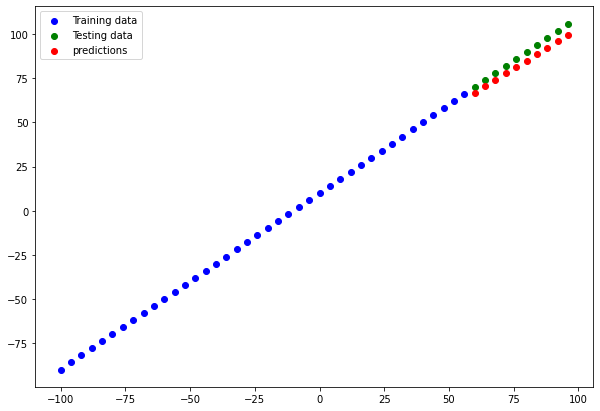

In [ ]:
y_pred_3 = model_3_1.predict(y_test)
plot_predictions(predictions = y_pred_3)

In [ ]:
mae3 = mae(y_test, y_pred_3)
mse3 = mse(y_test, y_pred_3)
mae3, mse3

(<tf.Tensor: shape=(), dtype=float32, numpy=4.790349>,
 <tf.Tensor: shape=(), dtype=float32, numpy=23.967478>)

### Comparing the results of our experiments


In [ ]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae3.numpy(), mse3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,4.790349,23.967478
